# 18 Visual Data Exploration

Seaborn requres a version of numpy later than 1.25 however then ProfileReport will stop work, you have to 
- conda install "numpy>=1.25" and then revert with conda install "numpy<1.25" 

In [3]:
import pandas as pd
df = pd.read_csv("../data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
import seaborn as sns
sns.pairplot(df.sample(1000))

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

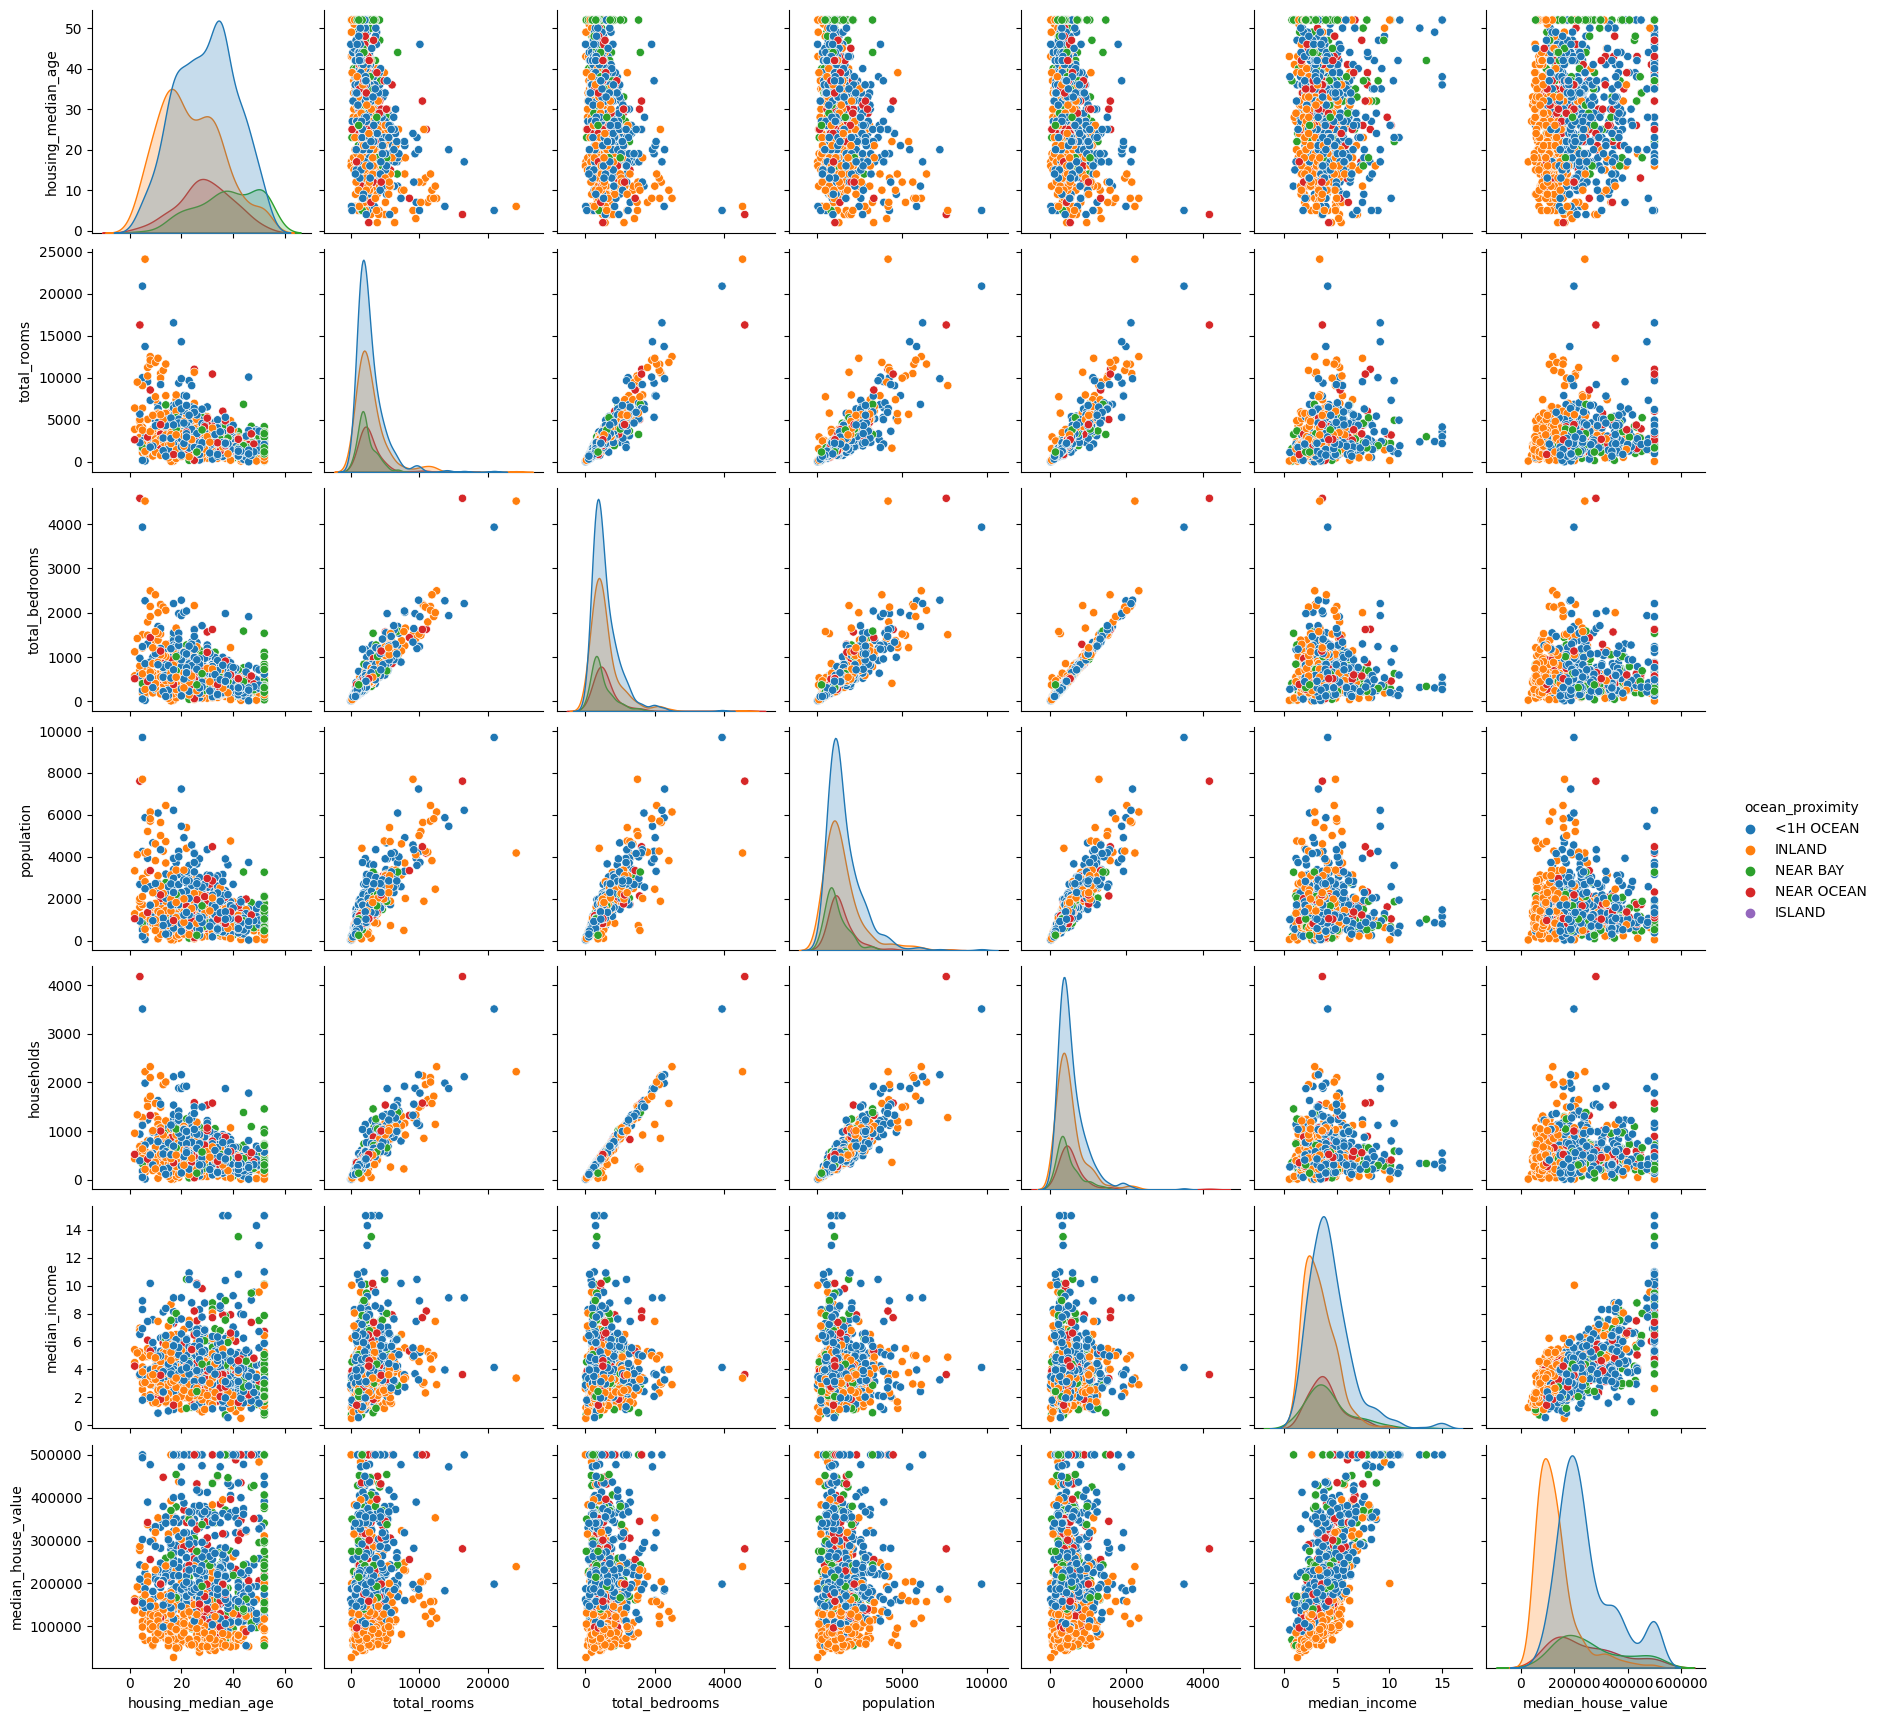

In [8]:
sns.pairplot(df.sample(1000).drop(["latitude", "longitude",], axis=1), hue="ocean_proximity")

<Axes: xlabel='median_house_value', ylabel='Density'>

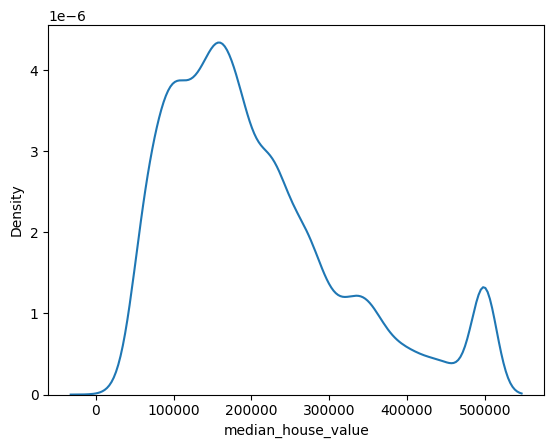

In [9]:
sns.kdeplot(df.median_house_value, )

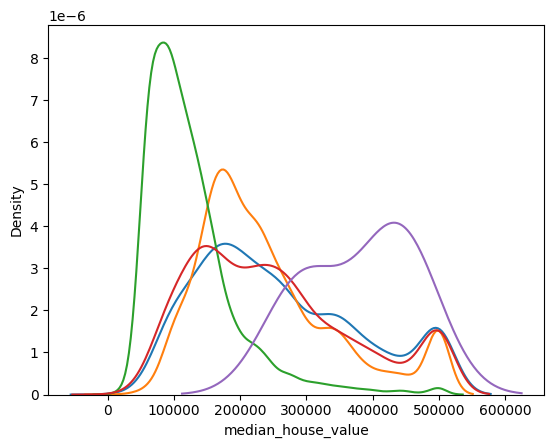

In [11]:
for cls in df.ocean_proximity.unique():
    sns.kdeplot(df[df.ocean_proximity==cls].median_house_value)

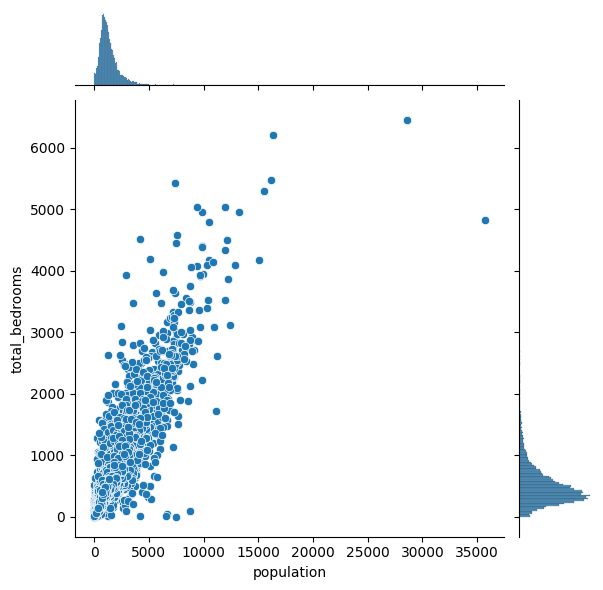

In [15]:
sns.jointplot(data=df, x="population", y="total_bedrooms")

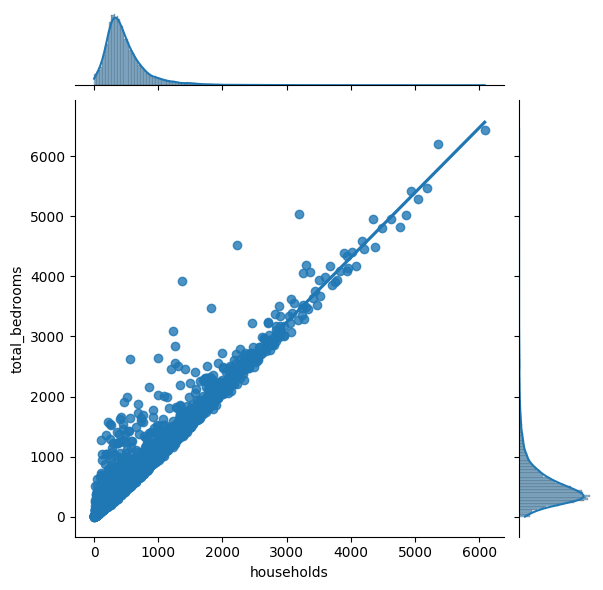

In [18]:
sns.jointplot(data=df, x="households", y="total_bedrooms", kind="reg")

<Axes: >

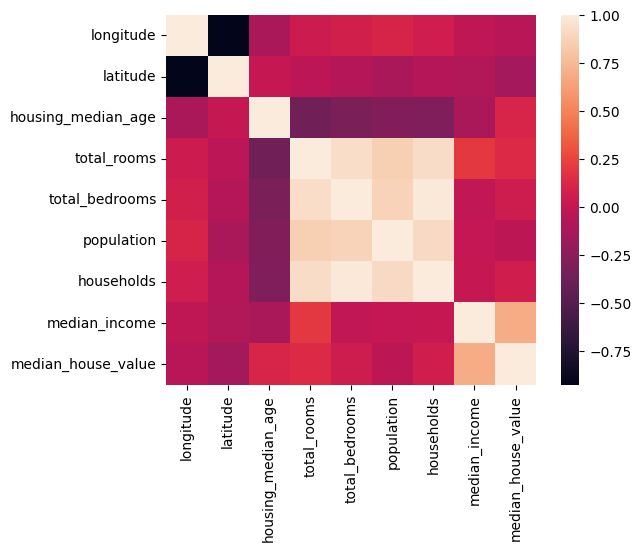

In [36]:
df2= df.loc[:, df.columns != 'ocean_proximity']
sns.heatmap(df2.corr(), square=True)

<Axes: >

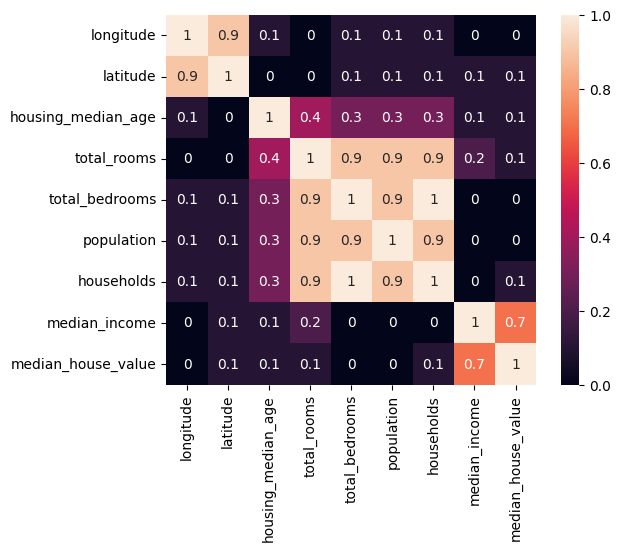

In [35]:
sns.heatmap(df2.corr().abs().round(1), square=True, annot=True)